In [1]:
!python3.8 --version

Python 3.8.16


In [2]:
import pandas

from utils import calculate_percent_replicating_Target,calculate_percent_matching_Target, calculate_percent_replicating_across_plates_Target
from utils import plot_simple_comparison, plot_two_comparisons
from utils import enforce_modality_match_order, enforce_timepoint_order, enforce_timepoint_order_in_plot, enforce_modality_match_order_in_plot

In [3]:
variable = 'Polybrene effect on compounds and matching'
variable_to_save = variable.replace(' ','_')

experiment_dict = {
    'Target2':{48:['BR00121434','BR00121435','BR00121440']},
    'Target2 + Polybrene':{48:['BR00121431','BR00121432','BR00121433']},
    'ORF':{48:['BR00117022','BR00117023'],96:['BR00118039','BR00118040']}
    }



In [4]:
plate_df = pandas.DataFrame()

for eachmap in list(experiment_dict.keys()):
    if 'Target2' in eachmap:
        plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachmap][48], 
        variable : eachmap, 'Percent Replicating' : calculate_percent_replicating_Target(
        '../profiles-pilots/profiles/2021_04_20_Target2',experiment_dict[eachmap][48],
            n_replicates=3)}, ignore_index=True)

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31413/3399854848.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachmap][48],
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31413/3399854848.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachmap][48],


Saved to ../figures/Polybrene effect on compounds and matching-Percent Replicating-Polybrene effect on compounds and matching-None-None.svg


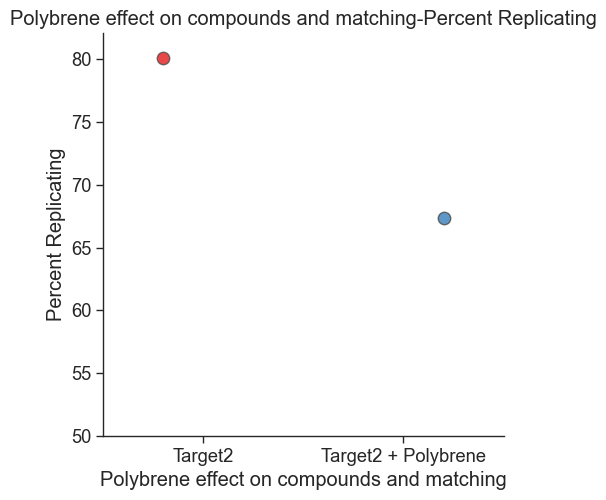

In [5]:
plot_simple_comparison(df=plate_df,x=variable,y='Percent Replicating',hue=variable)

In [6]:
plate_df.to_csv(f'checkpoint_csvs/{variable_to_save}-replicating.csv',index=False)

In [7]:
plate_match_df = pandas.DataFrame()

comparison_list = []

for eachmodality1 in list(experiment_dict.keys()):
    if 'Target' not in eachmodality1:
        batchpath1 = '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1'
        modality1 = eachmodality1
    else:
        batchpath1 = '../profiles-pilots/profiles/2021_04_20_Target2'
        modality1 = 'Compounds'
    for eachmodality2 in list(experiment_dict.keys()):
        if 'Target' not in eachmodality2 :
            batchpath2 = '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1'
            modality2 = eachmodality2
        else:
            batchpath2 = '../profiles-pilots/profiles/2021_04_20_Target2'
            modality2 = 'Compounds'
        for eachtimepoint1 in list(experiment_dict[eachmodality1].keys()):
            for eachtimepoint2 in list(experiment_dict[eachmodality2].keys()):
                string1 = f"{eachmodality1}-{eachtimepoint1}"
                string2 = f"{eachmodality2}-{eachtimepoint2}"
                if string1 != string2:
                    if f"{string1}-{string2}" not in comparison_list:
                        if f"{string2}-{string1}" not in comparison_list:
                            comparison_list.append(f"{string1}-{string2}")
                            plate_match_df = plate_match_df.append({'Percent Matching' : calculate_percent_matching_Target(
                                batchpath1, experiment_dict[eachmodality1][eachtimepoint1],modality1, 
                                batchpath2, experiment_dict[eachmodality2][eachtimepoint2],modality2),
                                'Modality Match' : enforce_modality_match_order(modality1,modality2), 
                                'Treatment timepoint':enforce_timepoint_order(eachtimepoint1,eachtimepoint2),
                                variable:f"{eachmodality1} - {eachmodality2}"}, ignore_index=True)


/Users/bcimini/Documents/GitHub/carpenterlab/2022_Cimini_NatureProtocols/notebooks/utils.py:559: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df_1['Metadata_modality'] = modality_1
/Users/bcimini/Documents/GitHub/carpenterlab/2022_Cimini_NatureProtocols/notebooks/utils.py:575: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df_2['Metadata_modality'] = modality_2
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31413/1107689175.py:27: FutureWarning: The frame.append method is deprecated and will be removed from

In [8]:
hue_order = enforce_timepoint_order_in_plot(list(plate_match_df['Treatment timepoint']))

x = variable
y = 'Percent Matching'
hue = 'Treatment timepoint'

Saved to ../figures/Polybrene effect on compounds and matching-Percent Matching-Treatment timepoint.png


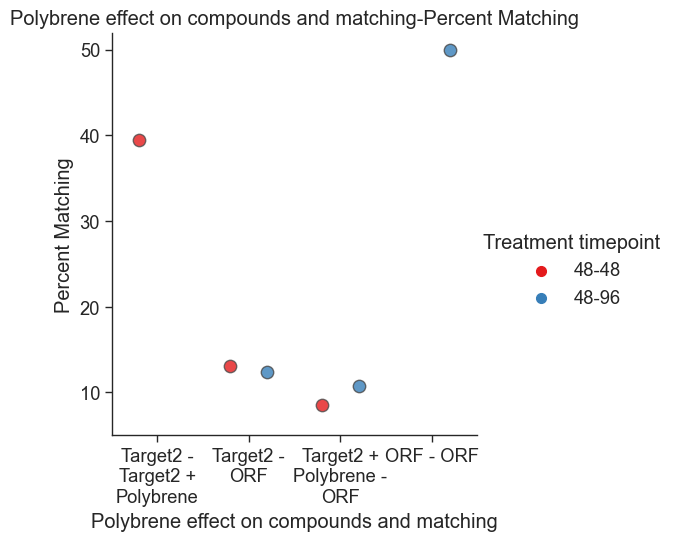

In [9]:
plot_simple_comparison(df=plate_match_df,x=x,y=y,hue=hue,
hue_order=hue_order,ylim=[5,40], plotname=f"{x}-{y}-{hue}.png")

In [10]:
print(plate_match_df['Percent Matching'])
plate_match_df.to_csv(f'checkpoint_csvs/{variable_to_save}-matching.csv',index=False)

0    39.464883
1    13.071895
2    12.418301
3     8.496732
4    10.784314
5    50.000000
Name: Percent Matching, dtype: float64


In [11]:
plate_to_plate_replicating_df = pandas.DataFrame()

comparison_list = []

for eachmap1 in ['Target2','Target2 + Polybrene']:
    for eachmap2 in ['Target2','Target2 + Polybrene']:
        for eachplate1 in experiment_dict[eachmap1][48]:
            for eachplate2 in experiment_dict[eachmap2][48]:
                string1 = f"{eachmap1}-{eachplate1}"
                string2 = f"{eachmap2}-{eachplate2}"
                if string1 != string2:
                    if f"{string1}-{string2}" not in comparison_list:
                        if f"{string2}-{string1}" not in comparison_list:
                            comparison_list.append(f"{string1}-{string2}")
                            ordered_map_list = [eachmap1,eachmap2]
                            ordered_map_list.sort()
                            ordered_plate_list = [eachplate1,eachplate2]
                            ordered_plate_list.sort()                            
                            plate_to_plate_replicating_df = plate_to_plate_replicating_df.append({
                                'Percent Replicating' : calculate_percent_replicating_across_plates_Target(
                                '../profiles-pilots/profiles/2021_04_20_Target2', eachplate1, 
                               '../profiles-pilots/profiles/2021_04_20_Target2', eachplate2),
                                variable:f"{ordered_map_list[0]} - {ordered_map_list[1]}",
                                'Plate Comparison':f"{ordered_plate_list[0]} - {ordered_plate_list[1]}"}, ignore_index=True)

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31413/2193292342.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_to_plate_replicating_df = plate_to_plate_replicating_df.append({
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31413/2193292342.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_to_plate_replicating_df = plate_to_plate_replicating_df.append({
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31413/2193292342.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_to_plate_replicating_df = plate_to_plate_replicating_df.append({
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31413/2193292342.py:19: FutureWarning: The frame.append method is deprecat

In [12]:
# Adjust below as needed
x = variable
y = 'Percent Replicating'
hue = 'Plate Comparison'


Saved to ../figures/Polybrene effect on compounds and matching-Percent Replicating-Plate Comparison.png


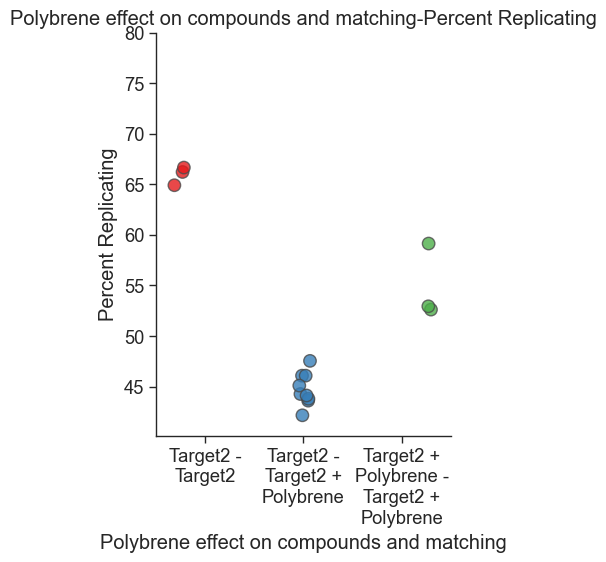

In [13]:
plot_simple_comparison(df=plate_to_plate_replicating_df,x=x,y=y,hue=x,
plotname=f"{x}-{y}-{hue}.png")

In [14]:
plate_to_plate_replicating_df.to_csv(f'checkpoint_csvs/{variable_to_save}-cross-plate-replication.csv',index=False)

In [15]:
!python3.8 --version

Python 3.8.16


In [16]:
import pandas

from utils import calculate_percent_replicating_Target,calculate_percent_matching_Target, calculate_percent_replicating_across_plates_Target
from utils import plot_simple_comparison, plot_two_comparisons
from utils import enforce_modality_match_order, enforce_timepoint_order, enforce_timepoint_order_in_plot, enforce_modality_match_order_in_plot

In [17]:
variable = 'Polybrene effect on compounds and matching'
variable_to_save = variable.replace(' ','_')
x = variable
y = 'Percent Matching'
hue = 'Treatment timepoint'
extended_hue_name = '            Treatment timepoints\n            of compared samples\n (shorter timepoint-longer timepoint)'
col = 'Modality Match'


In [18]:
plate_match_df = pandas.read_csv(f'checkpoint_csvs/{variable_to_save}-matching.csv')
hue_order = enforce_timepoint_order_in_plot(list(plate_match_df['Treatment timepoint']))


plate_match_df[extended_hue_name] = plate_match_df[hue]

Saved to ../figures/Polybrene effect on compounds and matching-Percent Matching-Treatment timepoint.svg


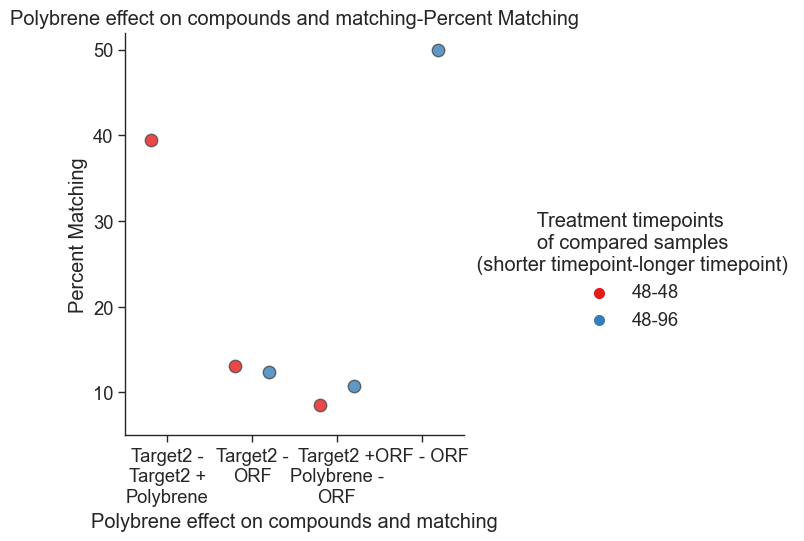

In [19]:
plot_simple_comparison(df=plate_match_df,x=x,y=y,hue=extended_hue_name,
hue_order=hue_order,ylim=[5,40], plotname=f"{x}-{y}-{hue}.svg")

In [20]:
x = variable
y = 'Percent Replicating'
hue = 'Plate Comparison'

In [21]:
plate_to_plate_replicating_df = pandas.read_csv(f'checkpoint_csvs/{variable_to_save}-cross-plate-replication.csv')

Saved to ../figures/Polybrene effect on compounds and matching-Percent Replicating-Plate Comparison.svg


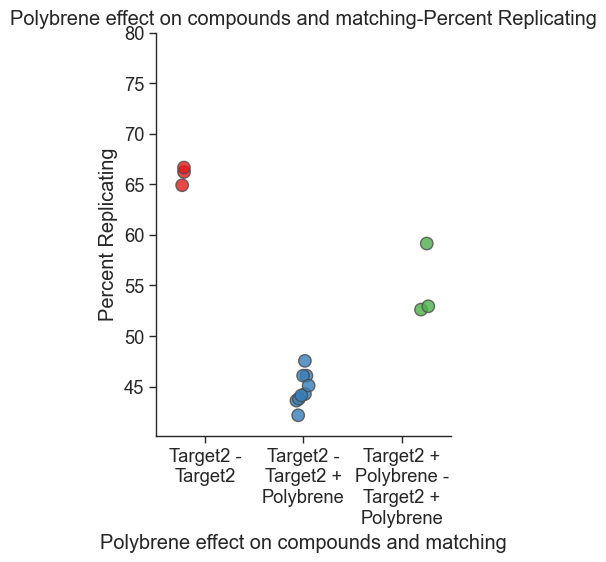

In [22]:
plot_simple_comparison(df=plate_to_plate_replicating_df,x=x,y=y,hue=x,
plotname=f"{x}-{y}-{hue}.svg")

In [23]:
!python3.8 --version

Python 3.8.16


In [24]:
import pandas 

variable = 'Polybrene effect on compounds and matching'
variable_to_save = variable.replace(' ','_')

experiment_dict = {
    'Target2':{48:['BR00121434','BR00121435','BR00121440']},
    'Target2 + Polybrene':{48:['BR00121431','BR00121432','BR00121433']},
    'ORF':{48:['BR00117022','BR00117023'],96:['BR00118039','BR00118040']}
    }

checkpoint_csv = f'checkpoint_csvs/{variable_to_save}-matching.csv'

In [25]:
def append_plates(checkpoint_csv,experiment_dict):
    df = pandas.read_csv(checkpoint_csv)
    df['Plates']=""
    for index, row in df.iterrows():
        lev1 = row[variable].split(' - ')
        lev2 = row["Treatment timepoint"].split('-')
        set_1 = experiment_dict[lev1[0]][int(lev2[0])]
        set_2 = experiment_dict[lev1[1]][int(lev2[1])]       
        df['Plates'][index] = str(set_1+set_2)
    df.to_csv(checkpoint_csv,index=False)

In [26]:
append_plates(checkpoint_csv,experiment_dict)

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31413/3691760862.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Plates'][index] = str(set_1+set_2)
